In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
from simpletransformers.language_representation import RepresentationModel

# Carregando base de dados  pré-processada

In [2]:
database = pd.read_csv("../../Database/dataBaseWithNER.csv")

database = database.drop(columns=["Unnamed: 0"])
database = database.dropna()
target = database["target"].values.tolist()
database

,email,target
0,start date hourahead timee cardinall hou...,0
1,service long desk price structure deal quote ...,0
2,start date cardinall hourahead timee card...,0
3,start date hourahead timee cardinall anc...,0
4,cardinall deliverable revenue management marke...,0
...,...,...
33340,bio matrix scientific group symbo bmxg p...,1
33341,cardinall step away hot naked webcam girl liv...,1
33342,need pill increase performance click seroius ...,1
33343,datee final nom inlet hpl eastrans car...,0


In [3]:
emailsText = []
for email in database["email"]:
    emailsText.append(email)

In [4]:
print(len(emailsText))

33341


# Representação vetorial GPT2

In [5]:
X_train = emailsText[:26000]

Y_train = target[:26000]

X_test = emailsText[26000:-1]
Y_test = target[26000:-1]

In [6]:
model=RepresentationModel(
    model_type="gpt2",
    model_name="gpt2",
    use_cuda=True,
    #fp16=True
)

vectorialRepresentation = model.encode_sentences(emailsText, combine_strategy="mean")
vectorialRepresentation.shape

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Some weights of the model checkpoint at gpt2 were not used when initializing GPT2ForTextRepresentation: ['h.11.attn.bias', 'h.5.attn.bias', 'h.5.ln_2.bias', 'h.2.attn.bias', 'h.2.attn.c_attn.bias', 'h.5.mlp.c_fc.bias', 'h.7.attn.c_proj.weight', 'h.10.ln_1.weight', 'h.11.attn.c_attn.bias', 'h.2.mlp.c_proj.weight', 'h.4.attn.bias', 'h.10.ln_2.bias', 'h.5.ln_2.weight', 'h.3.attn.c_proj.weight', 'h.11.ln_2.weight', 'h.2.attn.c_proj.weight', 'h.0.ln_1.weight', 'h.7.mlp.c_proj.bias', 'h.6.mlp.c_fc.weight', 'h.6.mlp.c_fc.bias', 'h.2.mlp.c_fc.weight', 'h.9.attn.c_proj.weight', 'h.6.attn.c_attn.bias', 'h.11.mlp.c_proj.weight', 'h.7.attn.c_proj.bias', 'h.9.mlp.c_proj.weight', 'h.3.ln_2.bias', 'h.0.attn.c_proj.weight', 'h.3.mlp.c_fc.bias', 'h.8.attn.bias', 'h.4.ln_1.weight', 'h.4.attn.c_attn.weight', 'h.6.ln_2.weight', 'h.10.mlp.c_fc.weight', 'h.1.ln_1.bias', 'h.7.mlp.c_proj.weight', 'h.8.mlp.c_fc.bias', 'h.8.attn.c_attn.bias', 'h.3.attn.c_attn.weight', 'h.8.attn.c_proj.weight', 'h.7.attn.c_attn.

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

(33341, 768)

In [7]:
gpt2Dataframe = pd.DataFrame(vectorialRepresentation)
gpt2Dataframe

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-1.720935,-0.023526,-0.743354,0.204791,1.010644,-0.830867,0.721024,-0.780136,1.136162,0.112345,...,1.038790,-0.776763,-0.600579,-1.112939,-1.282965,0.759167,-0.376124,0.581106,1.828999,-2.392465
1,-1.311162,0.742316,0.202008,-0.832470,2.121198,0.036568,-0.735903,-1.159517,0.209514,-0.735534,...,0.180557,0.163270,-0.545276,-0.160712,-1.050091,-0.973732,-0.223586,0.281737,0.993992,-1.093664
2,-1.613549,-0.121906,-0.244278,0.457948,1.282207,-0.348817,0.603470,-0.143732,0.708336,-0.441418,...,1.266254,-0.613317,-0.233853,-0.619568,-1.164543,0.239890,-1.089967,1.129646,1.491745,-2.110925
3,-1.708971,-0.042957,-0.772094,0.572821,1.418739,-0.508233,0.533895,-0.350519,1.055781,-0.198974,...,1.137816,-0.716726,-0.405698,-0.723117,-1.373377,0.603075,-0.804408,1.153702,1.901221,-2.562153
4,-1.653066,0.338048,0.100967,0.966783,1.006340,0.674801,0.456975,0.343461,0.166554,-0.575921,...,1.352527,-0.397707,-0.431623,-0.175424,-0.378089,0.561245,-0.520541,0.752223,1.260783,-0.513180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33336,-1.727967,-0.204029,0.957989,0.884536,1.260856,-0.326491,1.709011,0.360683,0.887070,-0.702635,...,0.986927,-0.113948,-0.520735,-0.280163,-1.024321,-0.241498,0.021910,0.937964,1.676697,-1.591196
33337,-1.715055,0.260558,0.641951,0.582118,1.481841,0.830118,0.380779,0.110515,0.279141,-0.834960,...,1.153177,0.179568,-0.079570,-0.291245,-0.268143,-0.184403,-0.586844,0.499743,1.228661,-0.650326
33338,-1.672276,0.569216,0.167208,0.966924,1.594888,-0.887654,0.660942,0.473567,0.517672,-0.455050,...,0.786002,0.718230,-0.577504,-0.670712,-1.039562,0.119136,-0.321140,1.400021,1.812490,-1.818911
33339,-1.086582,-0.037904,0.567242,1.337436,1.123404,-0.304514,0.492620,0.467648,-0.228583,-0.696143,...,1.548511,0.041835,0.114142,0.423129,-0.903542,0.332222,-0.771430,0.189503,1.970597,-2.182419


# Visualização de dados com TSNE

E:\DevPack\anaconda3\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\DevPack\anaconda3\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


               0          1  Target
0     -71.699974 -16.770399       0
1      -6.431869  11.403104       0
2      16.210714  16.236715       0
3      60.358383 -42.002441       0
4     -35.257069  11.333161       0
...          ...        ...     ...
33336  -2.720110  -5.100912       1
33337 -16.430706  14.502639       1
33338  36.405270 -23.492897       1
33339 -15.231197  46.753464       0
33340  -9.637349  -8.283697       1

[33341 rows x 3 columns]


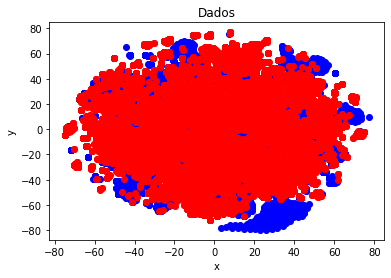

In [8]:
model = TSNE(n_components=2, random_state=0)
array_red = model.fit_transform(gpt2Dataframe)

df_tsne = pd.DataFrame(array_red)

df_tsne['Target'] = target
print(df_tsne)
df_tsne_c1 = df_tsne[df_tsne['Target'] == 0]

df_tsne_c2 = df_tsne[df_tsne['Target'] == 1]

plt.scatter(df_tsne_c1[0].array,df_tsne_c1[1].array,marker='o',color='blue')

plt.scatter(df_tsne_c2[0].array,df_tsne_c2[1].array,marker='o',color='red')

plt.title('Dados')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Validação

In [9]:
def getModel():
    return LogisticRegression(max_iter=400)

In [10]:
X_treino, X_teste, y_treino, y_teste = train_test_split(gpt2Dataframe.values,target,test_size=0.2)
modelo = getModel().fit(X_treino,y_treino)
score = modelo.score(X_teste,y_teste)
score

E:\DevPack\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8831908831908832

In [11]:
scores = cross_val_score(getModel(),gpt2Dataframe.values,target,cv=10)

scores.mean()

E:\DevPack\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\DevPack\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

0.8820971787651464

In [12]:
predicoes = cross_val_predict(getModel(), gpt2Dataframe.values, target, cv=10)

E:\DevPack\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\DevPack\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [13]:
print("\nClassification Report : ")
print(classification_report(target, predicoes, target_names=["Ham", "Spam"]))


Classification Report : 
              precision    recall  f1-score   support

         Ham       0.89      0.87      0.88     16493
        Spam       0.88      0.89      0.88     16848

    accuracy                           0.88     33341
   macro avg       0.88      0.88      0.88     33341
weighted avg       0.88      0.88      0.88     33341



(array([0, 1]), [Text(0, 0, 'Ham'), Text(1, 0, 'Spam')])

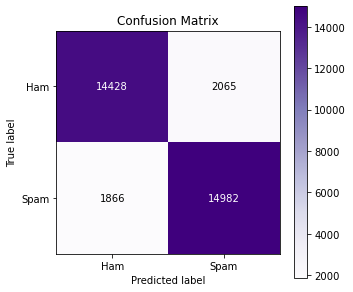

In [14]:
categories = ["Ham", "Spam"]

skplt.metrics.plot_confusion_matrix(
    [categories[i] for i in target], [categories[i] for i in predicoes.tolist()],
    title="Confusion Matrix",
    cmap="Purples",
    hide_zeros=True,
    figsize=(5,5)
)

plt.xticks()

(array([0, 1]), [Text(0, 0, 'Ham'), Text(1, 0, 'Spam')])

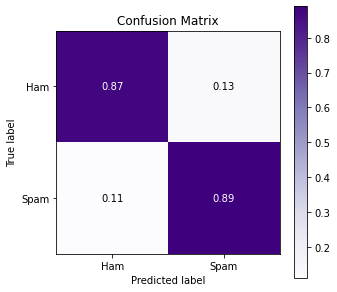

In [15]:
skplt.metrics.plot_confusion_matrix(
    [categories[i] for i in target], [categories[i] for i in predicoes.tolist()],
    normalize=True,
    title="Confusion Matrix",
    cmap="Purples",
    hide_zeros=True,
    figsize=(5,5)
)

plt.xticks()